# This notebook demonstrates a Hidden markov modeling of transition probabilities from times series data

# load required packages

In [5]:
using GraphRecipes, Plots
using Revise; using MDToolbox

# generate training data

In [14]:
# ground-truth transition probabilities
T = [
0.6 0.1 0.1 0.1 0.1;
0.1 0.6 0.1 0.1 0.1;
0.1 0.1 0.6 0.1 0.1;
0.1 0.1 0.1 0.6 0.1;
0.1 0.1 0.1 0.1 0.6
]

5×5 Array{Float64,2}:
 0.6  0.1  0.1  0.1  0.1
 0.1  0.6  0.1  0.1  0.1
 0.1  0.1  0.6  0.1  0.1
 0.1  0.1  0.1  0.6  0.1
 0.1  0.1  0.1  0.1  0.6

In [15]:
# equilibrium probabilities
pi_i = [
0.2, 
0.2, 
0.2,
0.2,
0.2
]

5-element Array{Float64,1}:
 0.2
 0.2
 0.2
 0.2
 0.2

In [16]:
# emission probabilities
emission = [
0.7 0.2 0.05 0.05;
0.2 0.7 0.05 0.05;
0.25 0.25 0.25 0.25;
0.05 0.05 0.7 0.2;
0.05 0.05 0.2 0.7
]

5×4 Array{Float64,2}:
 0.7   0.2   0.05  0.05
 0.2   0.7   0.05  0.05
 0.25  0.25  0.25  0.25
 0.05  0.05  0.7   0.2
 0.05  0.05  0.2   0.7

In [22]:
state, observation = msmgenerate(10000, T, pi_i, emission)

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 1, 1, 1, 1, 3, 3, 5, 5], [2, 1, 2, 1, 1, 1, 2, 2, 4, 3  …  3, 1, 1, 2, 3, 1, 4, 4, 4, 4])

# Hidden markov modeling

In [23]:
# initial transition probabilities
T0 = [
0.2 0.2 0.2 0.2 0.2;
0.2 0.2 0.2 0.2 0.2;
0.2 0.2 0.2 0.2 0.2;
0.2 0.2 0.2 0.2 0.2;
0.2 0.2 0.2 0.2 0.2
]

5×5 Array{Float64,2}:
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2

In [57]:
@time T1, emission1, pi_i1 = msmbaumwelch([observation], T0, pi_i, emission);

100 iteration LogLikelihood = -1.340637e+04  delta = 7.083758e-03  tolerance = 1.000000e-04
200 iteration LogLikelihood = -1.340582e+04  delta = 4.213758e-03  tolerance = 1.000000e-04
300 iteration LogLikelihood = -1.340548e+04  delta = 2.676770e-03  tolerance = 1.000000e-04
400 iteration LogLikelihood = -1.340526e+04  delta = 1.952003e-03  tolerance = 1.000000e-04
500 iteration LogLikelihood = -1.340508e+04  delta = 1.532345e-03  tolerance = 1.000000e-04
600 iteration LogLikelihood = -1.340495e+04  delta = 1.221476e-03  tolerance = 1.000000e-04
700 iteration LogLikelihood = -1.340484e+04  delta = 9.607730e-04  tolerance = 1.000000e-04
800 iteration LogLikelihood = -1.340475e+04  delta = 7.434367e-04  tolerance = 1.000000e-04
900 iteration LogLikelihood = -1.340469e+04  delta = 5.728301e-04  tolerance = 1.000000e-04
1000 iteration LogLikelihood = -1.340464e+04  delta = 4.480278e-04  tolerance = 1.000000e-04
1100 iteration LogLikelihood = -1.340460e+04  delta = 3.632377e-04  tolerance =

In [58]:
T

5×5 Array{Float64,2}:
 0.6  0.1  0.1  0.1  0.1
 0.1  0.6  0.1  0.1  0.1
 0.1  0.1  0.6  0.1  0.1
 0.1  0.1  0.1  0.6  0.1
 0.1  0.1  0.1  0.1  0.6

In [59]:
T1

5×5 Array{Float64,2}:
 0.566338   0.0745422  0.131625    0.0634193  0.164076
 0.130177   0.479983   0.215851    0.0637348  0.110255
 0.0471709  0.544677   0.00144199  0.380199   0.0265117
 0.156819   0.0888546  0.00712651  0.599056   0.148143
 0.129012   0.0214086  0.22657     0.0299081  0.593101

# visualization

In [60]:
using GraphRecipes, Plots
pyplot()

Plots.PyPlotBackend()

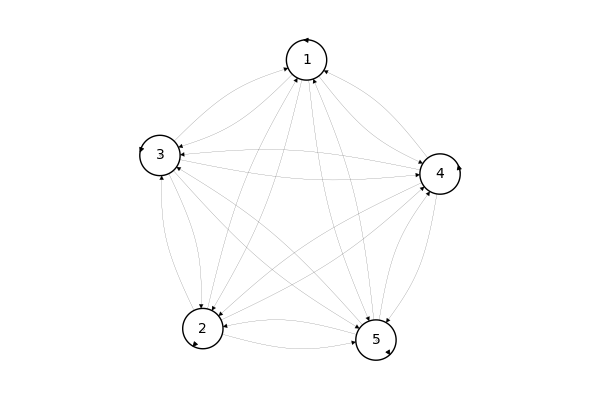

In [61]:
graphplot(T,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

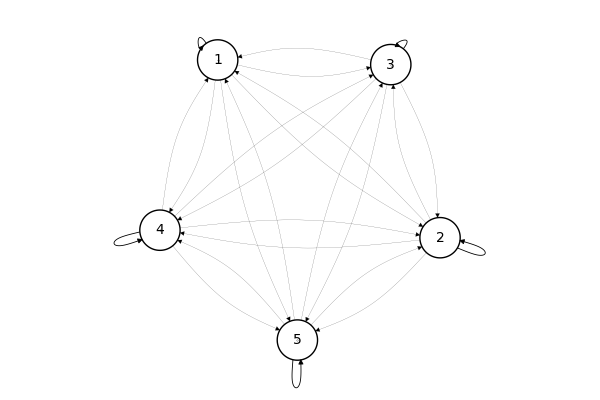

In [64]:
graphplot(T0,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T,
          arrow = true
          )

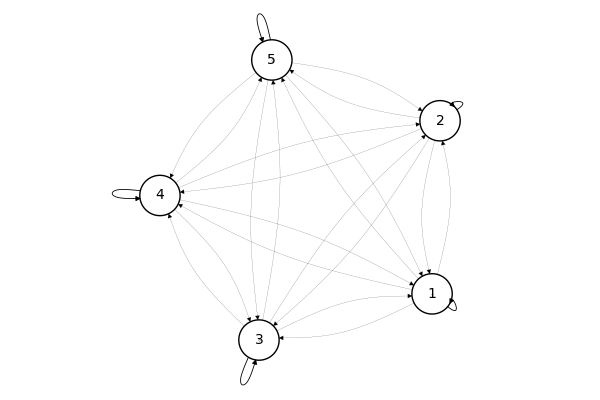

In [65]:
graphplot(T1,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T,
          arrow = true
          )